In [16]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Importing the data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.drop("SalePrice", axis=1)
mean = train.mean()
std = train.std()
train = (train - mean) / std
test = (test - mean.drop("SalePrice")) / std.drop("SalePrice")

In [44]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = np.zeros(len(m_now))
    b_gradient = 0
    mse = 0
    cmse = 0
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i][: -1].values
        y = points.iloc[i].SalePrice
        mse += (np.dot(m_now, x) + b_now - y) ** 2
        cmse = mse * std.SalePrice + mean.SalePrice
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    cmse /= n
    return m, b, cmse


m = np.zeros(len(train.columns)-1)
b = 0
L = 0.0001
cmse = 0
epochs = 1000
hist = []
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
        print(f"MSE: {cmse}")
    m, b, cmse = gradient_descent(m, b, train, L)   
    hist.append(cmse)
print(m, b)

Epoch: 0
MSE: 0
Epoch: 50
MSE: [74204.53384177 74204.53384177 74204.53384177 74204.53384177
 74204.53384177 74204.53384177 74204.53384177 74204.53384177
 74204.53384177 74204.53384177]
Epoch: 100
MSE: [68685.522171 68685.522171 68685.522171 68685.522171 68685.522171
 68685.522171 68685.522171 68685.522171 68685.522171 68685.522171]
Epoch: 150
MSE: [63524.75545266 63524.75545266 63524.75545266 63524.75545266
 63524.75545266 63524.75545266 63524.75545266 63524.75545266
 63524.75545266 63524.75545266]
Epoch: 200
MSE: [58712.66911843 58712.66911843 58712.66911843 58712.66911843
 58712.66911843 58712.66911843 58712.66911843 58712.66911843
 58712.66911843 58712.66911843]
Epoch: 250
MSE: [54239.91246888 54239.91246888 54239.91246888 54239.91246888
 54239.91246888 54239.91246888 54239.91246888 54239.91246888
 54239.91246888 54239.91246888]
Epoch: 300
MSE: [50097.34419704 50097.34419704 50097.34419704 50097.34419704
 50097.34419704 50097.34419704 50097.34419704 50097.34419704
 50097.34419704 50

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1000,) + inhomogeneous part.

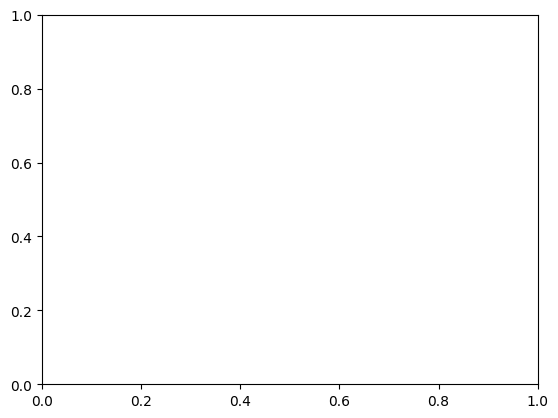

In [28]:
prediction = [np.dot(m,x) + b for x in test.values]
real = test.iloc[:, -1].values
plt.plot(range(epochs), hist)
plt.show()